In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D, Dense, Dropout, Flatten,Input, BatchNormalization, AveragePooling1D
from keras import regularizers
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Layer,Lambda

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("breastcancerdataset.csv")

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Don't need id column and Unnamed:32 column
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataset.shape

(569, 31)

In [6]:
#check for null values
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
y = dataset.iloc[:,0].values
x = dataset.drop(["diagnosis"],axis=1)
#y = dataset.iloc[:,0].values

In [8]:
x.to_numpy()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
x.shape

(569, 30)

In [10]:
print(y)
#encoding Categorical Data Turning 'y' values into numeric value
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()
y = labelencoder_x.fit_transform(y)
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [11]:
#spliting the dataset into train and test set

x_train,x_val,y_train,y_val= train_test_split(x,y,test_size = 0.1, random_state = 0)
x_train,x_test,y_train,y_test= train_test_split(x_train,y_train,test_size = 0.1, random_state = 0)

In [12]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)
x_val = min_max_scaler.fit_transform(x_val)
print(x_train.shape,x_test.shape,x_val.shape)

(460, 30) (52, 30) (57, 30)


In [14]:
x_train = x_train.reshape(460, 30,1)
x_test = x_test.reshape(52, 30,1)
x_val = x_val.reshape(57, 30,1)

In [15]:
input_data = Input(shape=(30,1))
#encoder
encoded = Conv1D(10, 3, activation="relu", padding = "same")(input_data)
encoded = BatchNormalization()(encoded)
encoded = AveragePooling1D(2, padding="same")(encoded) 

encoded = Conv1D(5, 3, activation="relu", padding="same")(encoded)
encoded = BatchNormalization()(encoded)
encoded = AveragePooling1D(2, padding="same")(encoded)

encoded = Conv1D(3, 3, activation="relu", padding="same")(encoded)
encoded = BatchNormalization()(encoded)
encoded = AveragePooling1D(2, padding="same")(encoded)

# 3 dimensions in the encoded layer
encoded = Conv1D(1, 2, activation="relu")(encoded)

#decoder
decoded = UpSampling1D(2)(encoded)
decoded = Conv1D(3, 3, activation='relu', padding="same")(decoded)
decoded = BatchNormalization()(decoded)

decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(5, 3, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)

decoded = UpSampling1D(3)(decoded)
decoded = Conv1D(10, 3, activation='relu',padding="same")(decoded)
decoded = BatchNormalization()(decoded)

decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(decoded)

encoder = Model(input_data, encoded)

In [16]:
autoencoder = Model(input_data, decoded)
opt = keras.optimizers.Adam(lr=0.01)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30, 1)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 10)            40        
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 10)            40        
_________________________________________________________________
average_pooling1d_1 (Average (None, 15, 10)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 5)             155       
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 5)             20        
_________________________________________________________________
average_pooling1d_2 (Average (None, 8, 5)              0   

In [17]:
history = autoencoder.fit(x_train, x_train,epochs=500,shuffle=True,validation_data=(x_val, x_val))

Train on 460 samples, validate on 57 samples
Epoch 1/500
460/460 [==============================] - 1s 3ms/step - loss: 0.1136 - val_loss: 0.0791
Epoch 2/500
460/460 [==============================] - 0s 322us/step - loss: 0.0948 - val_loss: 0.0756
Epoch 3/500
460/460 [==============================] - 0s 319us/step - loss: 0.0826 - val_loss: 0.0733
Epoch 4/500
460/460 [==============================] - 0s 318us/step - loss: 0.0728 - val_loss: 0.0710
Epoch 5/500
460/460 [==============================] - 0s 326us/step - loss: 0.0644 - val_loss: 0.0677
Epoch 6/500
460/460 [==============================] - 0s 323us/step - loss: 0.0566 - val_loss: 0.0654
Epoch 7/500
460/460 [==============================] - 0s 323us/step - loss: 0.0495 - val_loss: 0.0634
Epoch 8/500
460/460 [==============================] - 0s 339us/step - loss: 0.0432 - val_loss: 0.0618
Epoch 9/500
460/460 [==============================] - 0s 328us/step - loss: 0.0380 - val_loss: 0.0610
Epoch 10/500
460/460 [========

460/460 [==============================] - 0s 317us/step - loss: 0.0143 - val_loss: 0.0367
Epoch 80/500
460/460 [==============================] - 0s 323us/step - loss: 0.0142 - val_loss: 0.0377
Epoch 81/500
460/460 [==============================] - 0s 327us/step - loss: 0.0144 - val_loss: 0.0392
Epoch 82/500
460/460 [==============================] - 0s 312us/step - loss: 0.0142 - val_loss: 0.0349
Epoch 83/500
460/460 [==============================] - 0s 317us/step - loss: 0.0143 - val_loss: 0.0361
Epoch 84/500
460/460 [==============================] - 0s 314us/step - loss: 0.0141 - val_loss: 0.0373
Epoch 85/500
460/460 [==============================] - 0s 317us/step - loss: 0.0141 - val_loss: 0.0355
Epoch 86/500
460/460 [==============================] - 0s 319us/step - loss: 0.0143 - val_loss: 0.0415
Epoch 87/500
460/460 [==============================] - 0s 317us/step - loss: 0.0141 - val_loss: 0.0389
Epoch 88/500
460/460 [==============================] - 0s 317us/step - loss:

460/460 [==============================] - 0s 319us/step - loss: 0.0123 - val_loss: 0.0349
Epoch 157/500
460/460 [==============================] - 0s 324us/step - loss: 0.0123 - val_loss: 0.0340
Epoch 158/500
460/460 [==============================] - 0s 321us/step - loss: 0.0123 - val_loss: 0.0327
Epoch 159/500
460/460 [==============================] - 0s 321us/step - loss: 0.0121 - val_loss: 0.0348
Epoch 160/500
460/460 [==============================] - 0s 318us/step - loss: 0.0124 - val_loss: 0.0326
Epoch 161/500
460/460 [==============================] - 0s 326us/step - loss: 0.0127 - val_loss: 0.0341
Epoch 162/500
460/460 [==============================] - 0s 323us/step - loss: 0.0127 - val_loss: 0.0355
Epoch 163/500
460/460 [==============================] - 0s 326us/step - loss: 0.0124 - val_loss: 0.0350
Epoch 164/500
460/460 [==============================] - 0s 322us/step - loss: 0.0125 - val_loss: 0.0345
Epoch 165/500
460/460 [==============================] - 0s 323us/ste

Epoch 234/500
460/460 [==============================] - 0s 317us/step - loss: 0.0115 - val_loss: 0.0318
Epoch 235/500
460/460 [==============================] - 0s 317us/step - loss: 0.0113 - val_loss: 0.0346
Epoch 236/500
460/460 [==============================] - 0s 317us/step - loss: 0.0114 - val_loss: 0.0314
Epoch 237/500
460/460 [==============================] - 0s 319us/step - loss: 0.0113 - val_loss: 0.0308
Epoch 238/500
460/460 [==============================] - 0s 312us/step - loss: 0.0111 - val_loss: 0.0315
Epoch 239/500
460/460 [==============================] - 0s 314us/step - loss: 0.0112 - val_loss: 0.0312
Epoch 240/500
460/460 [==============================] - 0s 312us/step - loss: 0.0114 - val_loss: 0.0317
Epoch 241/500
460/460 [==============================] - 0s 314us/step - loss: 0.0112 - val_loss: 0.0323
Epoch 242/500
460/460 [==============================] - 0s 316us/step - loss: 0.0111 - val_loss: 0.0316
Epoch 243/500
460/460 [==============================] 

460/460 [==============================] - 0s 321us/step - loss: 0.0098 - val_loss: 0.0308
Epoch 313/500
460/460 [==============================] - 0s 310us/step - loss: 0.0099 - val_loss: 0.0309
Epoch 314/500
460/460 [==============================] - 0s 319us/step - loss: 0.0095 - val_loss: 0.0291
Epoch 315/500
460/460 [==============================] - 0s 329us/step - loss: 0.0098 - val_loss: 0.0295
Epoch 316/500
460/460 [==============================] - 0s 321us/step - loss: 0.0096 - val_loss: 0.0293
Epoch 317/500
460/460 [==============================] - 0s 317us/step - loss: 0.0095 - val_loss: 0.0292
Epoch 318/500
460/460 [==============================] - 0s 312us/step - loss: 0.0096 - val_loss: 0.0298
Epoch 319/500
460/460 [==============================] - 0s 314us/step - loss: 0.0098 - val_loss: 0.0291
Epoch 320/500
460/460 [==============================] - 0s 317us/step - loss: 0.0096 - val_loss: 0.0291
Epoch 321/500
460/460 [==============================] - 0s 330us/ste

460/460 [==============================] - 0s 334us/step - loss: 0.0088 - val_loss: 0.0278
Epoch 391/500
460/460 [==============================] - 0s 317us/step - loss: 0.0084 - val_loss: 0.0272
Epoch 392/500
460/460 [==============================] - 0s 310us/step - loss: 0.0084 - val_loss: 0.0270
Epoch 393/500
460/460 [==============================] - 0s 314us/step - loss: 0.0085 - val_loss: 0.0303
Epoch 394/500
460/460 [==============================] - 0s 325us/step - loss: 0.0084 - val_loss: 0.0275
Epoch 395/500
460/460 [==============================] - 0s 310us/step - loss: 0.0083 - val_loss: 0.0273
Epoch 396/500
460/460 [==============================] - 0s 319us/step - loss: 0.0083 - val_loss: 0.0258
Epoch 397/500
460/460 [==============================] - 0s 319us/step - loss: 0.0086 - val_loss: 0.0263
Epoch 398/500
460/460 [==============================] - 0s 321us/step - loss: 0.0084 - val_loss: 0.0274
Epoch 399/500
460/460 [==============================] - 0s 310us/ste

460/460 [==============================] - 0s 320us/step - loss: 0.0079 - val_loss: 0.0249
Epoch 468/500
460/460 [==============================] - 0s 328us/step - loss: 0.0079 - val_loss: 0.0251
Epoch 469/500
460/460 [==============================] - 0s 321us/step - loss: 0.0079 - val_loss: 0.0267
Epoch 470/500
460/460 [==============================] - 0s 320us/step - loss: 0.0079 - val_loss: 0.0249
Epoch 471/500
460/460 [==============================] - 0s 345us/step - loss: 0.0083 - val_loss: 0.0253
Epoch 472/500
460/460 [==============================] - 0s 351us/step - loss: 0.0081 - val_loss: 0.0279
Epoch 473/500
460/460 [==============================] - 0s 353us/step - loss: 0.0081 - val_loss: 0.0273
Epoch 474/500
460/460 [==============================] - 0s 347us/step - loss: 0.0078 - val_loss: 0.0288
Epoch 475/500
460/460 [==============================] - 0s 353us/step - loss: 0.0078 - val_loss: 0.0271
Epoch 476/500
460/460 [==============================] - 0s 317us/ste

In [18]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)

52/52 [==============================] - 0s 192us/step
Loss: 0.026116005073373135


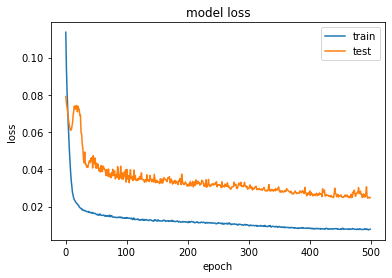

In [19]:
# Plot training loss and validation split loss over the epochs
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('ConvAE_model_loss.png')
plt.show()

In [20]:
autoencoder.evaluate(x_test, x_test)
#model.save('si_autoencoder.model')
data = autoencoder.predict(x_test)

52/52 [==============================] - 0s 153us/step


In [21]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [22]:
latent_vector.shape

(52, 3, 1)

In [23]:
latent_vector = latent_vector.reshape(52, 3)
latent_vector_train = latent_vector_train.reshape(460, 3)

In [24]:
y_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1])

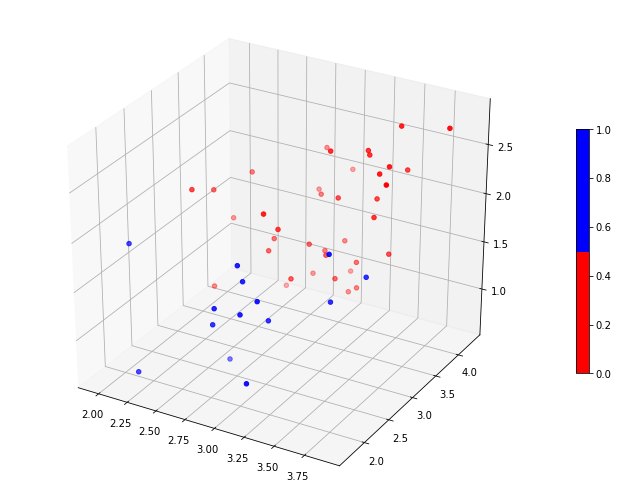

In [25]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','blue']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=20)
plt.savefig('ConvAE_3d.png')
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.8461538461538461 and k :  [1]


In [27]:
y_pred=knn.predict(latent_vector)

In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.21153846153846154
Mean Squared Error: 0.21153846153846154
Root Mean Squared Error: 0.45993310550389993
[[27 11]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        38
           1       0.56      1.00      0.72        14

    accuracy                           0.79        52
   macro avg       0.78      0.86      0.77        52
weighted avg       0.88      0.79      0.80        52

